<a href="https://colab.research.google.com/github/Aisyahazwn/Capstone-Project/blob/main/Capstone_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

data = pd.read_csv('BerasSabah_forUMK.csv', encoding='latin-1')
data.shape

(48, 22)

In [ ]:
data

,Sample,Varieti,Tahun,Lokasi 1,Lokasi 2,Al,As,Br,Ca,Cl,...,Mg,Mn,Na,P,Rb,S,Zn,K/Rb,15N,13C
0,RKB1,Beras keladi putih,2018,KTB,Tanah tinggi,3.908794,0.255651,2.045038,130.70,211.192851,...,1416.030623,26.692250,3.456196,3897.5,13.850358,1021.5,16.812059,213.604936,5.353333,26.766667
1,RKB2,Beras keladi putih,2018,KTB,Tanah tinggi,4.098055,0.227439,1.835055,125.20,221.864869,...,1392.675806,27.828642,3.418086,4100.0,18.598723,1051.0,17.585659,161.945134,5.625000,24.300000
2,RKB3,Beras keladi putih,2018,KTB,Tanah tinggi,5.756038,0.342907,1.653351,138.70,221.402958,...,1288.334684,28.938043,3.911606,3969.0,16.076497,1050.0,19.283078,185.236702,5.406667,26.820000
3,RKB31,Beras keladi putih,2019,KTB,Tanah tinggi,4.538099,0.140208,0.337570,111.50,140.750295,...,1184.764297,18.450297,9.124022,3538.0,19.425937,1007.0,19.691463,140.973294,3.273333,28.390000
4,RKB32,Beras keladi putih,2019,KTB,Tanah tinggi,4.997475,0.141032,0.395453,107.70,171.714621,...,1259.949762,18.029286,11.872180,3832.0,15.934032,1120.0,21.587973,186.186918,3.416667,28.966667
5,RKB33,Beras keladi putih,2019,KTB,Tanah tinggi,5.370562,0.136695,0.501214,112.60,170.125534,...,1372.244593,20.204135,11.300371,3925.0,23.200511,1064.0,23.989293,127.952242,3.770000,29.640000
6,RKB14,Beras putih Vietnam,2018,TPK,Tanah pamah,5.738612,0.107000,0.384703,70.70,232.439282,...,1339.604872,25.654436,6.232501,3758.0,4.571204,1207.0,17.656338,563.769711,6.173333,27.610000
7,RKB17,Beras putih Vietnam,2018,TPK,Tanah pamah,5.961398,0.185141,0.423423,72.25,291.752087,...,1620.715575,21.371610,3.616640,3899.0,6.375460,1110.0,21.803101,441.476949,5.383333,27.135000
8,RKB18,Beras putih Vietnam,2018,TPK,Tanah pamah,4.683733,0.127403,0.490863,70.20,240.285983,...,1145.780407,22.904712,3.048741,2965.0,4.089971,1046.0,17.181927,580.197958,5.273333,28.650000
9,RKB40,Beras putih Vietnam,2019,KKS,Tanah pamah,7.769298,0.147182,0.546665,96.60,273.589844,...,1504.354964,28.538477,8.147114,3476.0,3.611331,1083.0,22.584360,790.322676,4.273333,29.330000


In [ ]:
data.columns

Index(['Sample ', 'Varieti', 'Tahun', 'Lokasi 1', 'Lokasi 2', 'Al', 'As', 'Br',
       'Ca', 'Cl', 'Fe', 'K', 'Mg', 'Mn', 'Na', 'P', 'Rb', 'S', 'Zn', 'K/Rb',
       '15N', '13C'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sample    48 non-null     object 
 1   Varieti   48 non-null     object 
 2   Tahun     48 non-null     int64  
 3   Lokasi 1  48 non-null     object 
 4   Lokasi 2  48 non-null     object 
 5   Al        48 non-null     float64
 6   As        48 non-null     float64
 7   Br        48 non-null     float64
 8   Ca        48 non-null     float64
 9   Cl        48 non-null     float64
 10  Fe        48 non-null     float64
 11  K         48 non-null     float64
 12  Mg        48 non-null     float64
 13  Mn        48 non-null     float64
 14  Na        48 non-null     float64
 15  P         48 non-null     float64
 16  Rb        48 non-null     float64
 17  S         48 non-null     float64
 18  Zn        48 non-null     float64
 19  K/Rb      48 non-null     float64
 20  15N      48 non-null     float64


In [ ]:
data.nunique()

Sample      48
Varieti      5
Tahun        2
Lokasi 1     3
Lokasi 2     2
Al          48
As          48
Br          48
Ca          46
Cl          48
Fe          47
K           48
Mg          48
Mn          48
Na          48
P           47
Rb          48
S           41
Zn          48
K/Rb        48
15N        48
13C        47
dtype: int64

In [ ]:
data.isnull().sum()

Sample      0
Varieti     0
Tahun       0
Lokasi 1    0
Lokasi 2    0
Al          0
As          0
Br          0
Ca          0
Cl          0
Fe          0
K           0
Mg          0
Mn          0
Na          0
P           0
Rb          0
S           0
Zn          0
K/Rb        0
15N        0
13C        0
dtype: int64

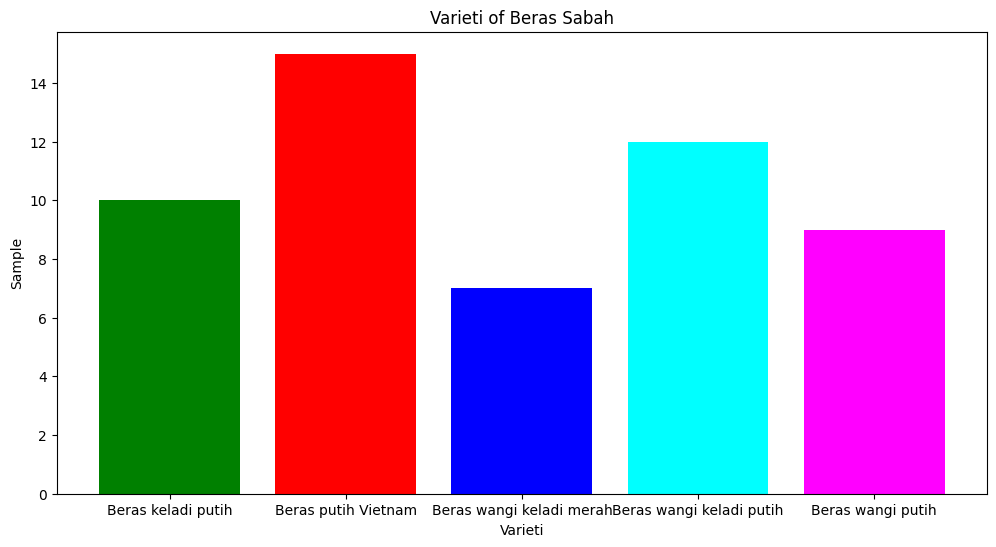

In [ ]:
import matplotlib.pyplot as plt

counter = [10, 15, 7, 12, 9]

index = [1, 2, 3, 4, 5]

plt.figure(1, figsize=(12, 6))
plt.bar(index, counter, color=['green', 'red', 'blue', 'cyan', 'magenta'])
plt.xticks(index, ['Beras keladi putih', 'Beras putih Vietnam', 'Beras wangi keladi merah', 'Beras wangi keladi putih', 'Beras wangi putih'], rotation=0)
plt.xlabel('Varieti')
plt.ylabel('Sample')
plt.title('Varieti of Beras Sabah')

plt.show()

In [ ]:
# Import the necessary module
from sklearn import svm

# Sample data (replace with your actual data)
X = [[0, 0], [1, 1]]  # Features
y = [0, 1]  # Labels

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=0).fit(X, y)

# Import the necessary module
import numpy as np
from sklearn import svm
# Sample data (replace with your actual data)
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

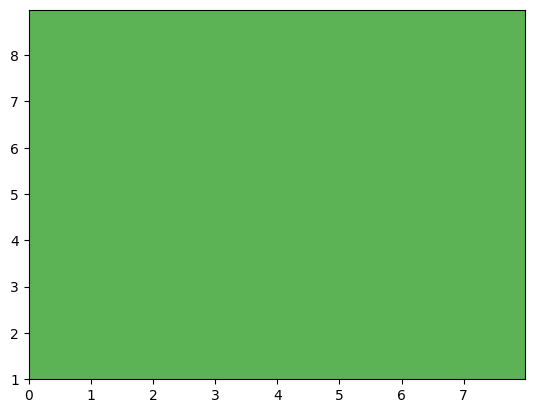

In [ ]:
# Import the necessary module
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

data = pd.read_csv('BerasSabah_forUMK.csv', encoding='latin-1')

# Create the meshgrid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

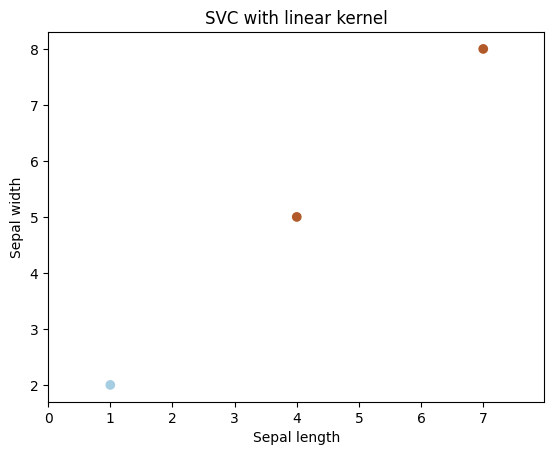

In [ ]:
# Import the necessary module
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

data = pd.read_csv('BerasSabah_forUMK.csv', encoding='latin-1')

# Create the meshgrid
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) # 'svc' is not defined in this context, commenting out for now
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # 'Z' is not defined, commenting out

# Assuming you want to color the points based on some criteria,
# create a dummy 'c' array with 3 elements
c = np.array([0, 1, 1])  # Replace with your actual color criteria
plt.scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [ ]:
# Import the necessary module
import numpy as np
from sklearn import svm

data = pd.read_csv('BerasSabah_forUMK.csv', encoding='latin-1')

# Sample data (replace with your actual data)
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Make sure 'y' has the same number of samples as 'X'
y = np.array([0, 1, 1])  # Example target variable, adjust as needed

# Create the SVC model instance
svc = svm.SVC(kernel='rbf', C=1, gamma=0) # Redefining 'svc' as it might have been overwritten

# Fit the model
svc.fit(X, y)

SVC(C=1, gamma=0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os  # Import the os module

path = '/content/drive/MyDrive/RiceImage'
Categories = [class_name for class_name in os.listdir(path) if class_name]

print(Categories)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input  # Import preprocess_input

image_dir = '/content/drive/My Drive/RiceImage'  # Update this path
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

data_generator = datagen.flow_from_directory(
    image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 2510 images belonging to 5 classes.


GPU device not found
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2510 images belonging to 5 classes.
1/1 [==============================] - 7s 7s/step
Accuracy: 0.99


<ipython-input-15-e7f3d0c008aa>:96: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


ValueError: cannot reshape array of size 4500 into shape (30,30)

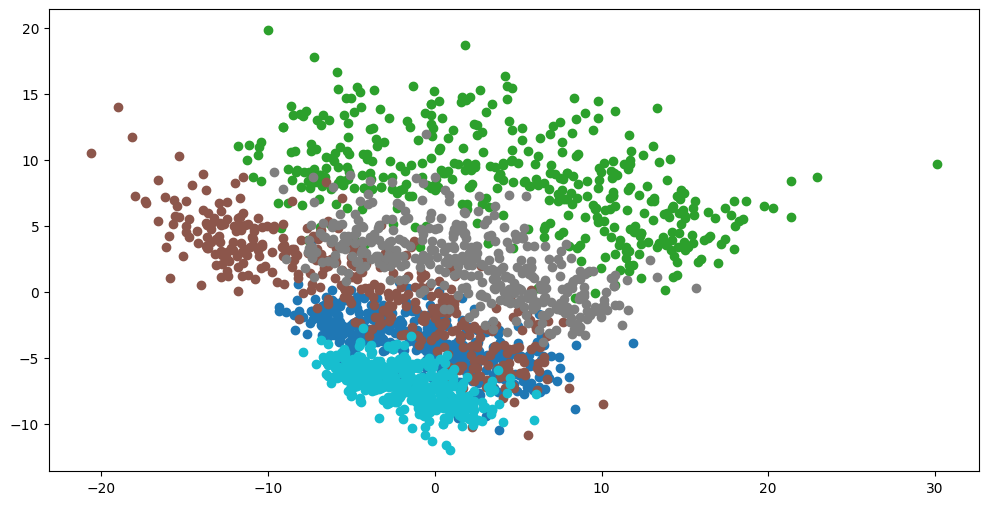

In [ ]:
import tensorflow as tf

# Verify GPU availability
if tf.test.gpu_device_name():
    print(f"GPU device: {tf.test.gpu_device_name()}")
else:
    print("GPU device not found")

# Step 1: Upload images or mount Google Drive and set the image directory
# Uncomment one of the following options based on your method

# Option 1: Upload images directly
# from google.colab import files
# uploaded = files.upload()
# import os
# os.makedirs('rice_images', exist_ok=True)
# for filename in uploaded.keys():
#     os.rename(filename, f'rice_images/{filename}')
# image_dir = 'rice_images'

# Option 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
image_dir = '/content/drive/My Drive/RiceImage'  # Update this path

# Step 2: Load and preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

data_generator = datagen.flow_from_directory(
    image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Step 3: Extract features using a pre-trained CNN (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

num_images = len(data_generator.filenames)
features = np.zeros((num_images, 512))
labels = np.zeros(num_images)

i = 0
for inputs_batch, labels_batch in data_generator:
    features_batch = base_model.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= num_images:
        break

# Step 4: Train an SVM model on the extracted features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Step 5: (Optional) Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

svm_model_pca = SVC(kernel='linear', C=1.0)
svm_model_pca.fit(X_pca, y_train)

def plot_svm_decision_boundary(model, X, y):
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))

    # Plot data points
    unique_labels = np.unique(y)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[y == label, 0], X[y == label, 1], color=colors(i), label=f'Class {int(label)}')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary with PCA (Features from VGG16)')
    plt.legend()
    plt.show()

plot_svm_decision_boundary(svm_model_pca, X_pca, y_train)

GPU device not found
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 2510 images belonging to 5 classes.
1/1 [==============================] - 8s 8s/step
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

     Arborio       0.98      0.97      0.97       100
     Basmati       0.99      0.99      0.99        90
      Ipsala       1.00      1.00      1.00       109
     Jasmine       0.98      0.99      0.99       108
   Karacadag       0.98      0.98      0.98        95

    accuracy                           0.99       502
   macro avg       0.99      0.99      0.99       502
weighted avg       0.99      0.99      0.99       502

Confusion Matrix:
 [[ 97   0   0   1   2]
 [  0  89   0   1   0]
 [  0   0 109   0   0]
 [  0   1   0 107   0]
 [  2   0   0   0  93]]


<ipython-input-16-00ae58c9fd06>:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


ValueError: cannot reshape array of size 4500 into shape (30,30)

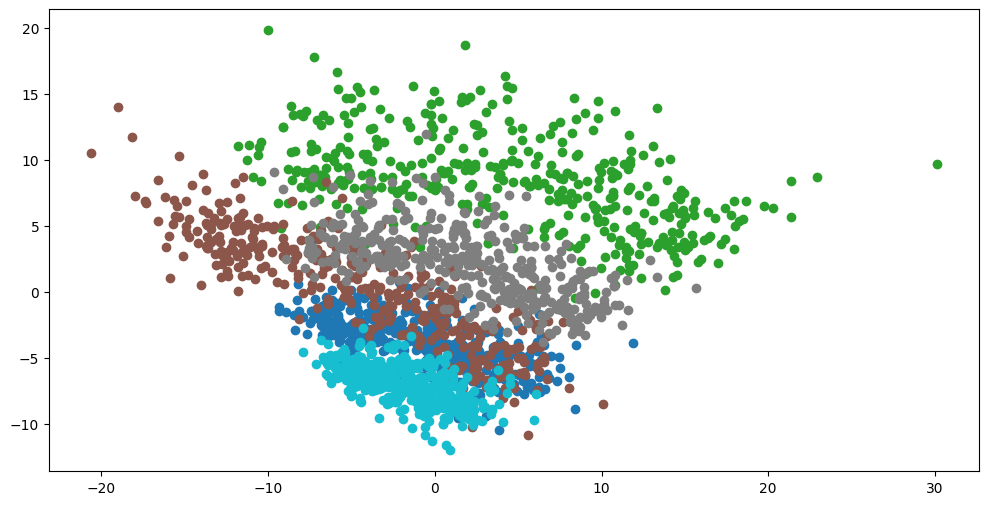

In [ ]:
import tensorflow as tf

# Verify GPU availability
if tf.test.gpu_device_name():
    print(f"GPU device: {tf.test.gpu_device_name()}")
else:
    print("GPU device not found")

# Step 1: Mount Google Drive and set the image directory
from google.colab import drive
drive.mount('/content/drive')
image_dir = '/content/drive/My Drive/RiceImage'  # Update this path

# Step 2: Load and preprocess images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np

image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

data_generator = datagen.flow_from_directory(
    image_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Step 3: Extract features using a pre-trained CNN (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

num_images = len(data_generator.filenames)
features = np.zeros((num_images, 512))
labels = np.zeros(num_images)

i = 0
for inputs_batch, labels_batch in data_generator:
    features_batch = base_model.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= num_images:
        break

# Step 4: Train an SVM model on the extracted features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train)

# Step 5: Make predictions and evaluate the model
y_pred = svm_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print classification report
class_report = classification_report(y_test, y_pred, target_names=data_generator.class_indices.keys())
print("Classification Report:\n", class_report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 6: (Optional) Reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

svm_model_pca = SVC(kernel='linear', C=1.0)
svm_model_pca.fit(X_pca, y_train)

def plot_svm_decision_boundary(model, X, y):
    plt.figure(figsize=(12, 6))

    # Plot data points
    unique_labels = np.unique(y)
    colors = plt.cm.get_cmap('tab10', len(unique_labels))
    for i, label in enumerate(unique_labels):
        plt.scatter(X[y == label, 0], X[y == label, 1], color=colors(i), label=f'Class {int(label)}')

    # Plot decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary with PCA (Features from VGG16)')
    plt.legend()
    plt.show()

plot_svm_decision_boundary(svm_model_pca, X_pca, y_train)

In [ ]:
from tensorflow.keras.applications import VGG16  # Import VGG16

base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

num_images = len(data_generator.filenames)
features = np.zeros((num_images, 512))
labels = np.zeros(num_images)

for i in range(len(data_generator)):  # Iterate over batches
    batch_images, batch_labels = data_generator.next()  # Get images and labels for the batch
    for j in range(batch_images.shape[0]):  # Iterate over images in the batch
        image = np.expand_dims(batch_images[j], axis=0)  # Expand dimensions for single image
        feature = base_model.predict(image)
        features[i * batch_size + j] = feature.flatten()
        labels[i * batch_size + j] = batch_labels[j]

    if i % 100 == 0:
        print(f"Processed {i * batch_size} images")

print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

1/1 [==============================] - 0s 490ms/step
Processed 0 images
1/1 [==============================] - 1s 881ms/step


IndexError: index 2510 is out of bounds for axis 0 with size 2510

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

num_images = len(data_generator.filenames)
features = np.zeros((num_images, 512))
labels = np.zeros(num_images)

i = 0
for inputs_batch, labels_batch in data_generator:
    features_batch = base_model.predict(inputs_batch)
    features[i * batch_size: (i + 1) * batch_size] = features_batch
    labels[i * batch_size: (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= num_images:
        break